In [22]:
import geokit as gk
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
gk.__version__

'1.2.8'

## SRS

In [4]:
# SRS - Spatial Reference System
#  - CRS - Coordinate reference system
#  - 'projection'
#  - proj4 system


# Basic latitude and longitude - EPSG4326
# Lambert azimuthal equal area (LAEA) - EPSG3035
# Mercator - EPSG3857

In [8]:
print(gk.srs.EPSG4326)

print(gk.srs.EPSG3035)

print(gk.srs.EPSG3857)

GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
PROJCS["ETRS89 / LAEA Europe",
    GEOGCS["ETRS89",
        DATUM["European_Terrestrial_Reference_System_1989",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6258"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4258"]],
    PROJECTION["Lambert_Azimuthal_Equal_Area"],
    PARAMETER["latitude_of_center",52],
    PARAMETER["longitude_of_center",10],
    PARAMETER["false_easting",4321000],
    PARAMETER["false_northing",3210

In [12]:
print(gk.srs.loadSRS(2004))

PROJCS["Montserrat 1958 / British West Indies Grid",
    GEOGCS["Montserrat 1958",
        DATUM["Montserrat_1958",
            SPHEROID["Clarke 1880 (RGS)",6378249.145,293.465,
                AUTHORITY["EPSG","7012"]],
            TOWGS84[174,359,365,0,0,0,0],
            AUTHORITY["EPSG","6604"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4604"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-62],
    PARAMETER["scale_factor",0.9995],
    PARAMETER["false_easting",400000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","2004"]]


In [14]:
poland_special_srs = gk.srs.loadSRS('PROJCS["PUWG_42_Strefa_4",GEOGCS["GCS_Pulkovo_1942",DATUM["Pulkovo_1942",SPHEROID["Krasovsky_1940",6378245,298.3]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",4500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",21],PARAMETER["Scale_Factor",1],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]')

print(poland_special_srs)

PROJCS["PUWG_42_Strefa_4",
    GEOGCS["GCS_Pulkovo_1942",
        DATUM["Pulkovo_1942",
            SPHEROID["Krasovsky_1940",6378245,298.3]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.017453292519943295]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["False_Easting",4500000],
    PARAMETER["False_Northing",0],
    PARAMETER["Central_Meridian",21],
    PARAMETER["Scale_Factor",1],
    PARAMETER["Latitude_Of_Origin",0],
    UNIT["Meter",1]]


In [16]:
aachen_centered_srs = gk.srs.centeredLAEA(6.083, 50.775)
print(aachen_centered_srs)

PROJCS["unnamed",
    GEOGCS["GRS 1980(IUGG, 1980)",
        DATUM["unknown",
            SPHEROID["GRS80",6378137,298.257222101],
            TOWGS84[0,0,0,0,0,0,0]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Lambert_Azimuthal_Equal_Area"],
    PARAMETER["latitude_of_center",50.775],
    PARAMETER["longitude_of_center",6.083],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]


In [18]:
# transforming points between SRS's
new_points = gk.srs.xyTransform(
    [(6.083, 50.775),
     (6.083, 50.875),
     (6.083, 50.975),
     (7.083, 50.175),
     (7.583, 50.775),], 
    fromSRS=gk.srs.EPSG4326,
    toSRS=aachen_centered_srs,
    outputFormat='xy')

In [26]:
for x,y in zip( new_points.x, new_points.y ):
    print(x, y)

5.6086412456393614e-11 1.0605099246605318e-09
5.5966859847770105e-11 11124.48031893997
5.584717712977507e-11 22249.12252108337
71432.80781956247 -66262.41755972906
105796.52244980012 1069.9939140476542


In [28]:
# Export as WKT
aachen_centered_srs.ExportToWkt()

'PROJCS["unnamed",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",50.775],PARAMETER["longitude_of_center",6.083],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1]]'

In [30]:
aachen_centered_srs.ExportToProj4()

'+proj=laea +lat_0=50.775 +lon_0=6.083 +x_0=0 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs '

In [29]:
gk.srs.loadSRS(aachen_centered_srs.ExportToWkt())

<osgeo.osr.SpatialReference; proxy of <Swig Object of type 'OSRSpatialReferenceShadow *' at 0x0000019DAD29DE10> >

## GEOMETRIES

### Types of objects
1. Point
1. MultiPoint
1. LineString
1. MultiLineString
1. Polygon
1. MultiPolygon

In [37]:
# Chloi's question about getting area
box = gk.geom.box(6,52,7,53, srs=gk.srs.EPSG4326)

print("Box area in degrees^2:", box.Area())

ctr = box.Centroid()

box_centered_laea_srs = gk.srs.centeredLAEA( ctr.GetX(), ctr.GetY() )

box.TransformTo(box_centered_laea_srs)

print("Box area in meters^2:", box.Area())

Box area in degrees^2: 1.0
Box area in meters^2: 7556368901.880909


In [41]:

aachen_pt = gk.geom.point( (6.083, 52.775), srs=gk.srs.EPSG4326 )
print( type(aachen_pt) )

<class 'osgeo.ogr.Geometry'>


In [51]:
print("X value is: ", aachen_pt.GetX() )
print("Y value is: ", aachen_pt.GetY() )
print("srs is: ",     aachen_pt.GetSpatialReference() )
print("type is: ",     aachen_pt.GetGeometryName() )

X value is:  6.083
Y value is:  52.775
srs is:  GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
type is:  POINT


In [52]:
# Get the buffer around this point
aachen_buffered_area = aachen_pt.Buffer(1)

print( type(aachen_buffered_area) )
print("type is: ",     aachen_buffered_area.GetGeometryName() )

<class 'osgeo.ogr.Geometry'>
type is:  POLYGON


In [58]:
# Make a line
aachen_line = gk.geom.line(
    [(5.6086412456393614e-11, 1.0605099246605318e-09),
     (5.5966859847770105e-11, 11124.48031893997),
     (5.584717712977507e-11, 22249.12252108337),
     (71432.80781956247, -66262.41755972906),
     (105796.52244980012, 1069.9939140476542),],
    srs=aachen_centered_srs
)

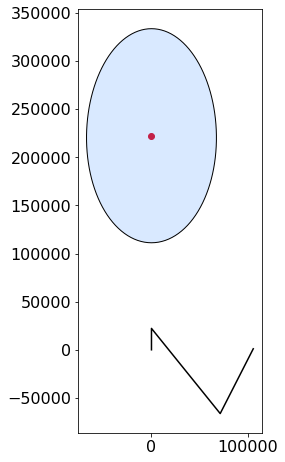

In [62]:
# Draw some geometries

srs = 'PROJCS["unnamed",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",50.775],PARAMETER["longitude_of_center",6.083],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1]]'


axh = gk.drawGeoms( aachen_buffered_area, figsize=(6,6), srs=aachen_centered_srs )
axh = gk.drawGeoms( aachen_pt, ax=axh, srs=aachen_centered_srs )
axh = gk.drawGeoms( aachen_line, ax=axh , srs=aachen_centered_srs)
plt.show()

In [71]:
ctr_polygon = aachen_buffered_area.Centroid()
print("polygon center - X", ctr_polygon.GetX())
print("polygon center - Y", ctr_polygon.GetY())
print("polygon srs", ctr_polygon.GetSpatialReference())

ctr_line = aachen_line.Centroid()
print("line center - X", ctr_line.GetX())
print("line center - Y", ctr_line.GetY())
print("line srs", ctr_line.GetSpatialReference())

polygon center - X 6.0830000000000055
polygon center - Y 52.77500000000006
polygon srs None
line center - X 50860.04492137159
line center - Y -22306.158516041916
line srs None


In [72]:
## GOTCHYA!
# Apply the old srs
ctr_line.AssignSpatialReference( aachen_line.GetSpatialReference() )
print("line srs", ctr_line.GetSpatialReference())

line srs PROJCS["unnamed",
    GEOGCS["GRS 1980(IUGG, 1980)",
        DATUM["unknown",
            SPHEROID["GRS80",6378137,298.257222101],
            TOWGS84[0,0,0,0,0,0,0]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Lambert_Azimuthal_Equal_Area"],
    PARAMETER["latitude_of_center",50.775],
    PARAMETER["longitude_of_center",6.083],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]


<class 'osgeo.ogr.Geometry'>
LINESTRING


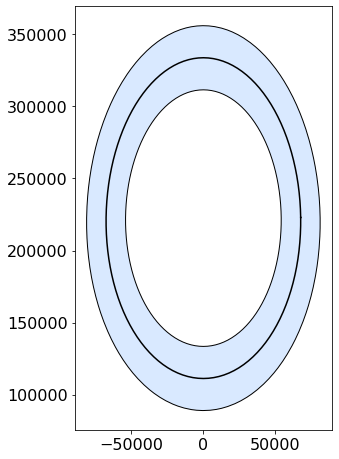

In [76]:
# Get a boundary
boundary_polygon = aachen_buffered_area.Boundary()
print(type(boundary_polygon))
print(boundary_polygon.GetGeometryName())

axh = gk.drawGeoms( boundary_polygon.Buffer(0.2), figsize=(6,6), srs=aachen_centered_srs )
gk.drawGeoms( boundary_polygon, figsize=(6,6), srs=aachen_centered_srs, ax=axh )

plt.show()

In [85]:
# test for containment
print(aachen_buffered_area.Contains( aachen_pt ))
print(aachen_buffered_area.Contains( aachen_line ))
print(boundary_polygon.Buffer(0.2).Contains( aachen_buffered_area ))
print(boundary_polygon.Buffer(0.2).Crosses( aachen_buffered_area ))
print(boundary_polygon.Buffer(0.2).Touches( aachen_buffered_area ))
print(boundary_polygon.Buffer(0.2).Overlaps( aachen_buffered_area ))

True
False
False
False
False
True


In [91]:
# Get Points
boundary_polygon_3857 = gk.geom.transform(boundary_polygon, toSRS=gk.srs.EPSG3857)
gk.geom.extractVerticies(boundary_polygon_3857)[:5,:]

array([[ 788475.95328876, 6941486.97274921],
       [ 788323.39379549, 6931862.13450443],
       [ 787866.13347064, 6922275.17314894],
       [ 787105.42563299, 6912752.18910776],
       [ 786043.35532983, 6903319.01626946]])

In [92]:
boundary_polygon_3857.SimplifyPreserveTopology(10)

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x0000019DAD2802D0> >

AxHands(ax=<matplotlib.axes._axes.Axes object at 0x0000019DADA8ED00>, handles=[<matplotlib.patches.PathPatch object at 0x0000019DAE158AC0>], cbar=None)

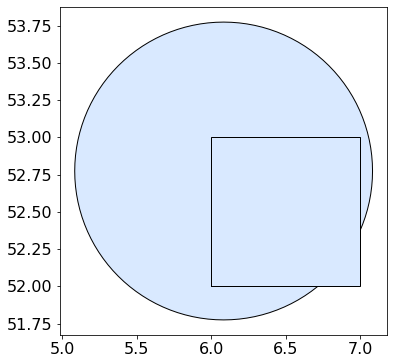

In [99]:
# Intersect & Union
axh = gk.drawGeoms(aachen_buffered_area, figsize=(5,5), srs=4326)
gk.drawGeoms(box, figsize=(5,5), srs=4326, ax=axh)

In [102]:
# GOTCHYA!! All geometry operations need to happen in the same SRS
box_transformed = gk.geom.transform(box, toSRS=aachen_buffered_area.GetSpatialReference())

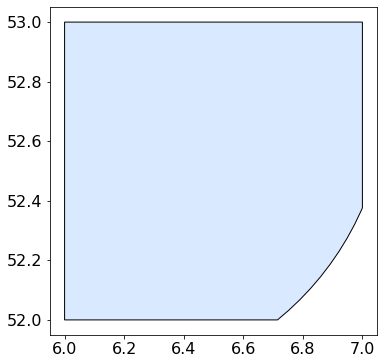

In [103]:
unioned_geom = aachen_buffered_area.Intersection(box_transformed)
axh = gk.drawGeoms(unioned_geom, figsize=(5,5), srs=4326)

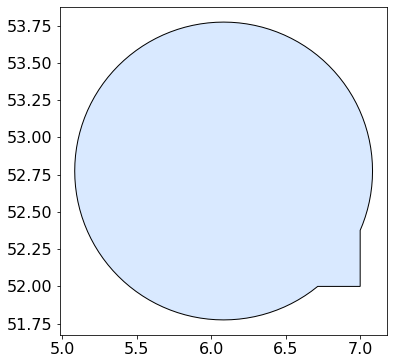

In [104]:
unioned_geom = aachen_buffered_area.Union(box_transformed)
axh = gk.drawGeoms(unioned_geom, figsize=(5,5), srs=4326)

# VECTOR

In [105]:
# Vector files contain - Geometry objects
# Vector files contain - Tabular properties 

In [114]:
ehighway_df = gk.vector.extractFeatures(r"C:\Users\s.ryberg\FZJ\data\scenario\ehighway\e-highway\e-highway2.shp", where="NUTS_ID like '%DE%'")
ehighway_df

,geom,e-id,NUTS_ID,SHAPE_AREA,SHAPE_LEN,STAT_LEVL_
0,"MULTIPOLYGON (((6.738572 53.575449,6.7568655 5...",31_de,DEF,2.162878,17.403420,1.0
1,"MULTIPOLYGON (((14.2692585 53.7060115,14.25540...",32_de,DEE03,0.026103,0.839181,3.0
2,"POLYGON ((8.65255 52.531443501,8.6714815 52.51...",33_de,DEA,4.413792,17.821058,1.0
3,"MULTIPOLYGON (((11.7666465 52.077072,11.763559...",34_de,DEE01,0.032151,1.128252,3.0
4,"MULTIPOLYGON (((7.3687555 49.161458,7.3624895 ...",35_de,DEB,2.485150,11.890698,1.0
5,"MULTIPOLYGON (((8.7046285 47.713314499,8.71191...",36_de,DE1,4.386041,15.789144,1.0
6,"POLYGON ((10.1207125 50.555857001,10.139066 50...",37_de,DE2,8.665278,26.095781,1.0


AxHands(ax=<matplotlib.axes._axes.Axes object at 0x0000019DAF2CDFA0>, handles=0    [PathPatch1572((8.68834, 53.8793) ...), PathPa...
1    [PathPatch1118((12.6936, 54.4309) ...), PathPa...
2                PathPatch1018((8.65255, 52.5314) ...)
3    [PathPatch1294((13.1509, 51.8596) ...), PathPa...
4    [PathPatch1359((7.36876, 49.1615) ...), PathPa...
5    [PathPatch1031((9.64432, 49.7786) ...), PathPa...
6                PathPatch1670((10.1207, 50.5559) ...)
dtype: object, cbar=None)

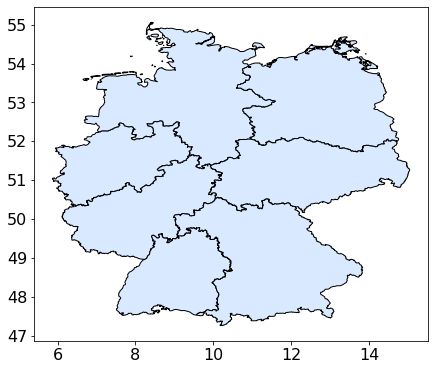

In [113]:
gk.geom.drawGeoms(ehighway_df, figsize=(6,6))

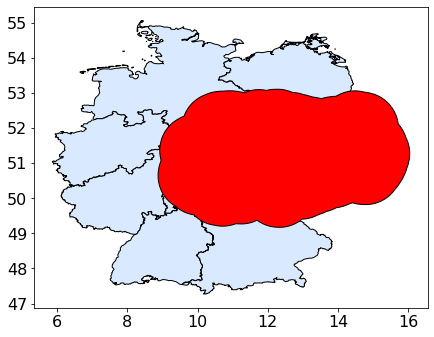

In [119]:
g2 = ehighway_df.geom.iloc[3].Buffer(1)
axh = gk.geom.drawGeoms(ehighway_df, figsize=(6,6))
gk.geom.drawGeoms(g2, ax=axh, figsize=(6,6), fc='red')

plt.show()

In [121]:
# Simple vector creation
gk.vector.createVector( [unioned_geom, aachen_buffered_area, box_transformed], 
                       output=r'C:\Users\s.ryberg\FZJ\workdir\2031_Geokit_workshop\example_file.shp' )

'C:\\Users\\s.ryberg\\FZJ\\workdir\\2031_Geokit_workshop\\example_file.shp'

In [122]:
# Suggested vector creation
df = pd.DataFrame()
df['geom'] = [unioned_geom, aachen_buffered_area, box_transformed]
df["pop"] = [3000, 4000, 200]

gk.vector.createVector( df, output=r'C:\Users\s.ryberg\FZJ\workdir\2031_Geokit_workshop\example_file_df.shp' )


'C:\\Users\\s.ryberg\\FZJ\\workdir\\2031_Geokit_workshop\\example_file_df.shp'

8


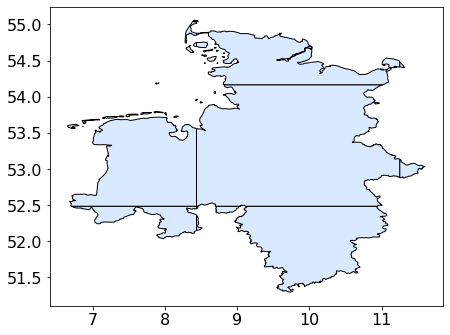

In [134]:
# Edgar's question - making subregions

tiled_geoms = list(gk.geom.tileize(ehighway_df.geom.iloc[0], zoom=7))
print(len(tiled_geoms))

gk.geom.drawGeoms(tiled_geoms, figsize=(6,6))
plt.show()

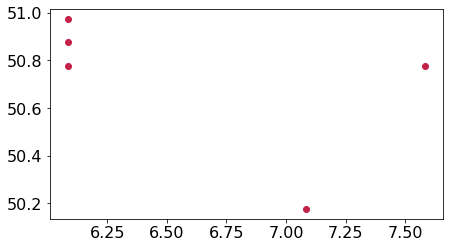

In [137]:
# Voronoi
aachen_points = [
     gk.geom.point(5.6086412456393614e-11, 1.0605099246605318e-09, srs=aachen_centered_srs),
     gk.geom.point(5.5966859847770105e-11, 11124.48031893997, srs=aachen_centered_srs),
     gk.geom.point(5.584717712977507e-11, 22249.12252108337, srs=aachen_centered_srs),
     gk.geom.point(71432.80781956247, -66262.41755972906, srs=aachen_centered_srs),
     gk.geom.point(105796.52244980012, 1069.9939140476542, srs=aachen_centered_srs)]


gk.geom.drawGeoms(aachen_points, figsize=(6,6))
plt.show()

# Use function scipy.spatial.Voronoi

8


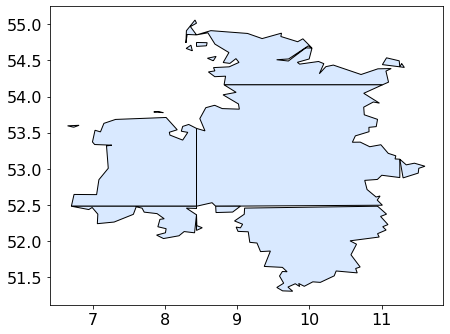

In [148]:
# Edgar's question - making vector files simple

tiled_geoms = list(gk.geom.tileize(ehighway_df.geom.iloc[0], zoom=7))
print(len(tiled_geoms))

gk.geom.drawGeoms( [g.SimplifyPreserveTopology(5000) for g in tiled_geoms], figsize=(6,6))
plt.show()

# Or use https://mapshaper.org/

In [158]:
# Operating on geom column - Make new file with centroids
ehighway_center_df = ehighway_df.copy(deep=True)

def find_centroid(g):
    g2 = g.Centroid().Buffer(2)
    g2.AssignSpatialReference(g.GetSpatialReference())
    g2 = gk.geom.transform(g2, toSRS=gk.srs.EPSG3035)
    return g2

ehighway_center_df.geom = ehighway_df.geom.apply( find_centroid )
ehighway_center_df

,geom,e-id,NUTS_ID,SHAPE_AREA,SHAPE_LEN,STAT_LEVL_
0,"POLYGON ((4409979.34123991 3336848.41439994,44...",31_de,DEF,2.162878,17.403420,1.0
1,"POLYGON ((4637446.88147107 3338467.89798273,46...",32_de,DEE03,0.026103,0.839181,3.0
2,"POLYGON ((4290590.95018701 3152214.62161923,42...",33_de,DEA,4.413792,17.821058,1.0
3,"POLYGON ((4622694.53653186 3130293.03844306,46...",34_de,DEE01,0.032151,1.128252,3.0
4,"POLYGON ((4334828.74321536 3012000.86022048,43...",35_de,DEB,2.485150,11.890698,1.0
5,"POLYGON ((4398429.84938033 2825627.81179853,43...",36_de,DE1,4.386041,15.789144,1.0
6,"POLYGON ((4571419.0268313 2876216.13531185,457...",37_de,DE2,8.665278,26.095781,1.0


In [155]:
# save this a new shapefile
gk.vector.createVector(ehighway_center_df, output=r'C:\Users\s.ryberg\FZJ\workdir\2031_Geokit_workshop\example_centroid_df.shp')

'C:\\Users\\s.ryberg\\FZJ\\workdir\\2031_Geokit_workshop\\example_centroid_df.shp'

In [160]:
# Filtering spatially

aachen_pt_real = gk.geom.point( (6.083, 50.775), srs=gk.srs.EPSG4326 )

ehighway_df_geom_filtered = gk.vector.extractFeatures(r"C:\Users\s.ryberg\FZJ\data\scenario\ehighway\e-highway\e-highway2.shp", geom=aachen_pt_real)
ehighway_df_geom_filtered

,geom,e-id,NUTS_ID,SHAPE_AREA,SHAPE_LEN,STAT_LEVL_
0,"POLYGON ((8.65255 52.531443501,8.6714815 52.51...",33_de,DEA,4.413792,17.821058,1.0


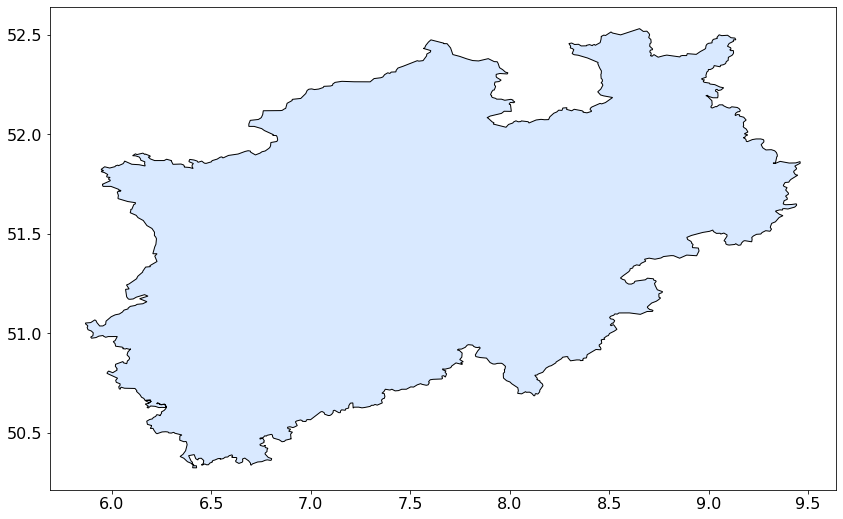

In [161]:
gk.drawGeoms(ehighway_df_geom_filtered)
plt.show()

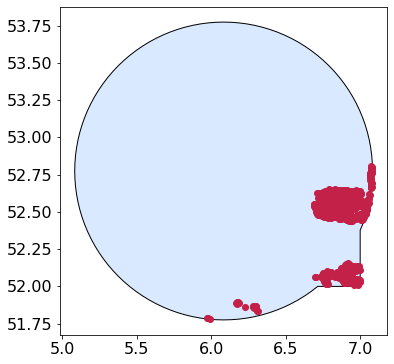

In [166]:
aachen_pt_real = gk.geom.point( (6.083, 50.775), srs=gk.srs.EPSG4326 )

germany_placements = gk.vector.extractFeatures(r"C:\Users\s.ryberg\FZJ\data\results\1832_Onshore_turbine_placements\02_updated_placement_files\turbine_placements_8Dx4D_DEU.shp", 
                                               geom=unioned_geom)

axh = gk.drawGeoms(unioned_geom, figsize=(5,5), srs=4326)
gk.drawGeoms(germany_placements, ax = axh)
plt.show()

In [169]:
# Vector info
vinfo = gk.vector.vectorInfo(r"C:\Users\s.ryberg\FZJ\data\scenario\ehighway\e-highway\e-highway2.shp")
print("COUNT", vinfo.count)
print("SRS", vinfo.srs)
print("ATTRIBUTES", vinfo.attributes)

COUNT 115
SRS GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
ATTRIBUTES ['e-id', 'NUTS_ID', 'SHAPE_AREA', 'SHAPE_LEN', 'STAT_LEVL_']


In [175]:
# Points as inputs

# PD point series is okay
germany_placements.geom

# numpy array
np.array([ (pt.GetX(), pt.GetY()) for pt in germany_placements.geom])

# LocationSet
location_set = gk.LocationSet(germany_placements.geom)
print(location_set)

 , Lon      , Lat
0, 7.07639  , 52.69673 
1, 7.06777  , 52.75925 
2, 6.71096  , 52.52984 
3, 6.71889  , 52.52736 
4, 6.96295  , 52.56035 
...
709, 6.99592  , 52.02652 
710, 6.99447  , 52.03188 
711, 6.84714  , 52.46651 
712, 6.85181  , 52.47338 
713, 6.82422  , 52.52931 



In [178]:
location_set.asGeom(srs=aachen_centered_srs)
location_set.asXY(srs=aachen_centered_srs)

array([[ 67169.62263592, 214255.31171887],
       [ 66492.24445215, 221202.30279823],
       [ 42621.75990534, 195415.15199366],
       ...,
       [ 52247.88942498, 189224.55882527],
       [ 50309.31963076, 195427.90063816],
       [ 50499.81058336, 192835.02429986]])

In [184]:
# Extract Feature
ehighway_df_geom_filtered = gk.vector.extractFeature(r"C:\Users\s.ryberg\FZJ\data\scenario\ehighway\e-highway\e-highway2.shp", geom=aachen_pt_real)
ehighway_df_geom_filtered.attr

{'e-id': '33_de',
 'NUTS_ID': 'DEA',
 'SHAPE_AREA': 4.41379166688,
 'SHAPE_LEN': 17.8210577631,
 'STAT_LEVL_': 1.0}

# Raster
1. width
1. height
1. resolution
1. extent
1. datatype
1. srs

In [212]:
raster_matrix = np.array([[1,2,3],
                          [2,2,2],
                          [3,2,1],])

ras = gk.raster.createRaster( 
        bounds = [5,48,8,51], 
        pixelWidth=1, 
        pixelHeight=1, 
        data=raster_matrix,
        srs=gk.srs.EPSG4326)

C:\Users\s.ryberg\FZJ\workdir\2031_Geokit_workshop\geokit\geokit\core\raster.py:1559: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(h, cax=cbax, **tmp)


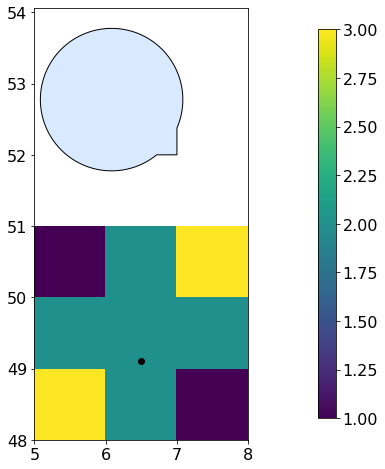

In [203]:
axh = gk.drawRaster(ras, srs=gk.srs.EPSG4326, figsize=(6,6))
gk.drawGeoms(unioned_geom, ax=axh)
axh.ax.plot([5.5], [49.1], 'ko')
plt.show()

In [190]:
# extract matrix
gk.raster.extractMatrix( ras )

array([[1, 2, 3],
       [2, 2, 2],
       [3, 2, 1]])

In [215]:
# extract value at a given location
value_near = gk.raster.interpolateValues( 
                source=r"C:\Users\s.ryberg\FZJ\data\geography\global_solar_atlas\World_GHI_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF\GHI.tif",
                points=[(5.5,49.1),(5.6,49.1),(5.7,49.1)])
print(value_near)


# This may be a bug
value_interp = gk.raster.interpolateValues( 
                source=r"C:\Users\s.ryberg\FZJ\data\geography\global_solar_atlas\World_GHI_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF\GHI.tif",
                points=[(5.5,49.1), (5.6,49.1), (5.7,49.1)],
                mode="linear-spline")
print(value_interp)

[3.103 3.147 3.176]
[3.10274994 3.14249998 3.17700005]


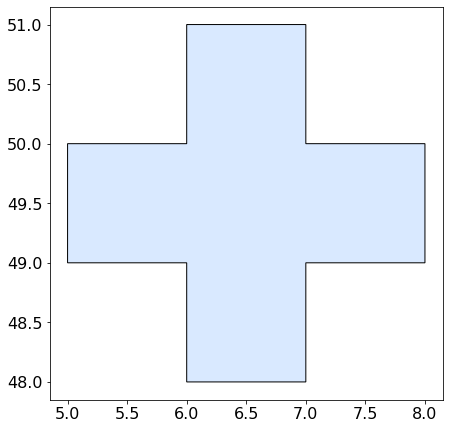

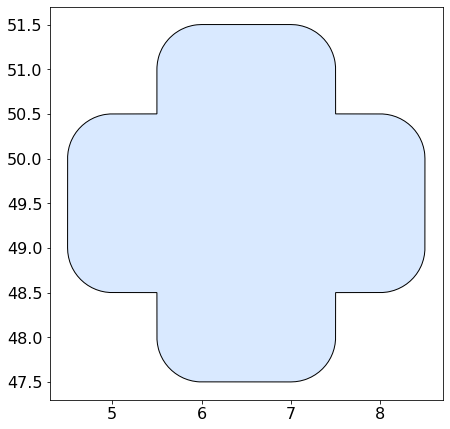

In [226]:
# polygonize a raster

ras_boolean = gk.raster.createRasterLike( 
                source=ras,
                data=raster_matrix==2)

polygonized_geoms = gk.raster.polygonizeRaster(ras_boolean)

gk.drawGeoms(polygonized_geoms.geom[polygonized_geoms.value==1], figsize=(6,6))
plt.show()

gk.drawGeoms(polygonized_geoms.geom[polygonized_geoms.value==1].iloc[0].Buffer(0.5), figsize=(6,6))
plt.show()

C:\Users\s.ryberg\FZJ\workdir\2031_Geokit_workshop\geokit\geokit\core\raster.py:1559: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(h, cax=cbax, **tmp)


AxHands(ax=<matplotlib.axes._axes.Axes object at 0x0000019DB524F130>, handles=<matplotlib.image.AxesImage object at 0x0000019DB51C8820>, cbar=<matplotlib.colorbar.Colorbar object at 0x0000019DB51A1A00>)

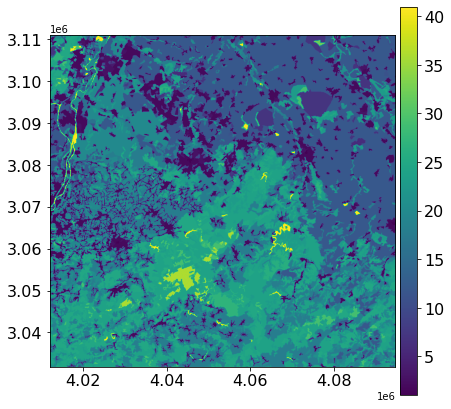

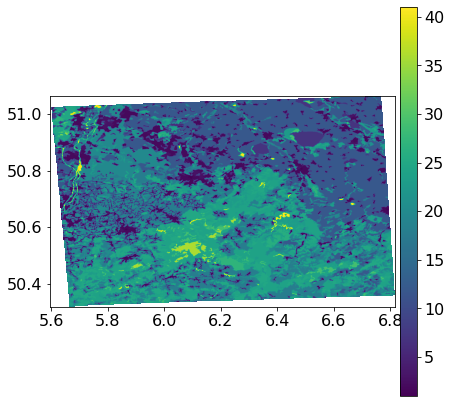

In [233]:
# Warp
gk.drawRaster(gk._test_data_['clc-aachen_clipped.tif'], figsize=(6,6))


warped_raster = gk.raster.warp(gk._test_data_['clc-aachen_clipped.tif'], srs=gk.srs.EPSG4326, resampleAlg='near')
gk.drawRaster(warped_raster, figsize=(6,6))

# Extent

In [236]:
ext = gk.Extent( 5, 50, 6, 52, srs=gk.srs.EPSG4326 )

C:\Users\s.ryberg\FZJ\workdir\2031_Geokit_workshop\geokit\geokit\core\raster.py:1559: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(h, cax=cbax, **tmp)


AxHands(ax=<matplotlib.axes._axes.Axes object at 0x0000019DB5D86310>, handles=<matplotlib.image.AxesImage object at 0x0000019DB5FC2B20>, cbar=<matplotlib.colorbar.Colorbar object at 0x0000019DB5FC20A0>)

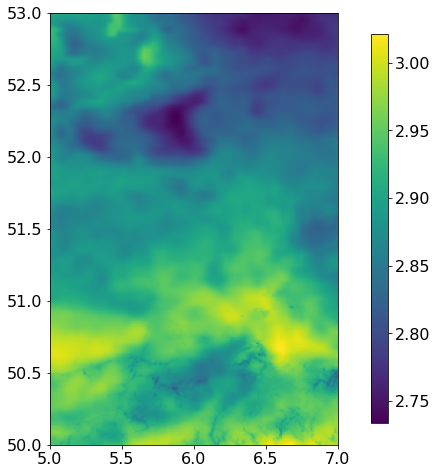

In [238]:
# Clip a raster
clipped_ghi = ext.warp(
    source=r"C:\Users\s.ryberg\FZJ\data\geography\global_solar_atlas\World_GHI_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF\GHI.tif",
    resampleAlg='bilinear',
    pixelWidth=0.01,
    pixelHeight=0.01
)

gk.drawRaster(clipped_ghi, figsize=(6,6))

In [240]:
ext.box

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x0000019DB5FEA5D0> >

AxHands(ax=<matplotlib.axes._axes.Axes object at 0x0000019DB5C43DF0>, handles=[<matplotlib.patches.PathPatch object at 0x0000019DB6009310>, <matplotlib.patches.PathPatch object at 0x0000019DB6009580>, <matplotlib.patches.PathPatch object at 0x0000019DB6009730>], cbar=None)

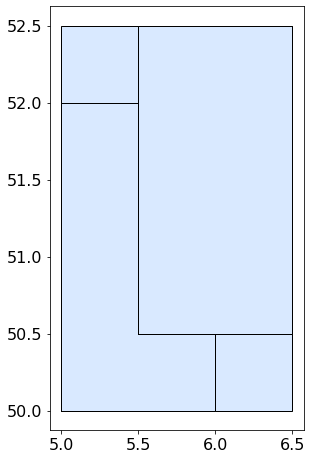

In [246]:
ext =  gk.Extent( 5, 50, 6, 52, srs=gk.srs.EPSG4326 )
ext2 = gk.Extent( 5.5, 50.5, 6.5, 52.5, srs=gk.srs.EPSG4326 )

ext3 = ext + ext2

gk.drawGeoms( [ext3.box, ext.box, ext2.box], figsize=(6,6) )

In [249]:
ext_from_raster = ext.fromRaster(r"C:\Users\s.ryberg\FZJ\data\geography\global_solar_atlas\World_GHI_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF\GHI.tif")
ext_from_vector = ext.fromVector(r"C:\Users\s.ryberg\FZJ\data\scenario\ehighway\e-highway\e-highway2.shp")
ext_from_geom = ext.fromGeom(aachen_buffered_area)

In [252]:
ext_from_geom.castTo( gk.srs.EPSG3035 ).pad(2, percent=True).fit(500)

xMin: 3980000.000000
xMax: 4130500.000000
yMin: 3186500.000000
yMax: 3421000.000000
srs: PROJCS["ETRS89 / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","3035"]]

In [ ]:
# Filter sources
ext.filterSources([])

In [253]:
ext.xyXY

(5, 50, 6, 52)

In [254]:
ext.xXyY

(5, 6, 50, 52)

In [258]:
raster_matrix = np.array([[1,2,3,1,2,3],
                          [2,2,2,2,2,2],
                          [3,2,1,3,2,1],
                          [3,2,1,3,2,1],
                          [3,2,1,3,2,1],
                          [3,2,1,3,2,1],
                          [3,2,1,3,2,1],])

ext = gk.Extent([5,48,8,51], srs=gk.srs.EPSG4326)
dx,dy = ext.computePixelSize(raster_matrix.shape[1], raster_matrix.shape[0])
ext.createRaster( 
    pixelHeight=dy, 
    pixelWidth=dx, 
    data=raster_matrix, 
    output="test_raster_with_ext.tif" )


'test_raster_with_ext.tif'

In [259]:
ext.rasterMosaic?

Signature: ext.rasterMosaic(sources, _warpKwargs={}, _skipFiltering=False, **kwargs)
Docstring:
Create a raster source surrounding the Extent from a collection of other rasters

Parameters:
-----------
sources : list, or something acceptable to gk.Extent.filterSources
    The sources to add together over the invoking Extent

Returns:
--------
* If 'output' is None: gdal.Dataset
* If 'output' is a string: None
File:      c:\users\s.ryberg\fzj\workdir\2031_geokit_workshop\geokit\geokit\core\extent.py
Type:      method


# RegionMask

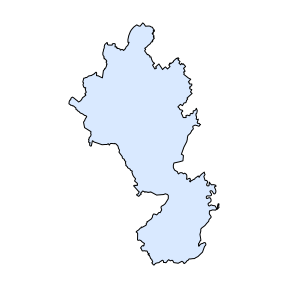

In [262]:
aachen_rm = gk.RegionMask.load(gk._test_data_["aachenShapefile.shp"], pixelRes=20, srs=aachen_centered_srs)
aachen_rm

In [268]:
print("aachen_rm.extent", aachen_rm.extent)
# print("aachen_rm.srs", aachen_rm.srs)
print("aachen_rm.pixelWidth", aachen_rm.pixelWidth)
print("aachen_rm.pixelHeight", aachen_rm.pixelHeight)

aachen_rm.extent (-7640.00000,-31220.00000,23820.00000,19500.00000)
aachen_rm.pixelWidth 20
aachen_rm.pixelHeight 20


In [270]:
ras = aachen_rm.warp(r"C:\Users\s.ryberg\FZJ\data\geography\global_solar_atlas\World_GHI_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF\GHI.tif", returnMatrix=False)

C:\Users\s.ryberg\FZJ\workdir\2031_Geokit_workshop\geokit\geokit\core\raster.py:1559: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(h, cax=cbax, **tmp)


AxHands(ax=<matplotlib.axes._axes.Axes object at 0x0000019DB8A493A0>, handles=<matplotlib.image.AxesImage object at 0x0000019DB8A19820>, cbar=<matplotlib.colorbar.Colorbar object at 0x0000019DB8822CD0>)

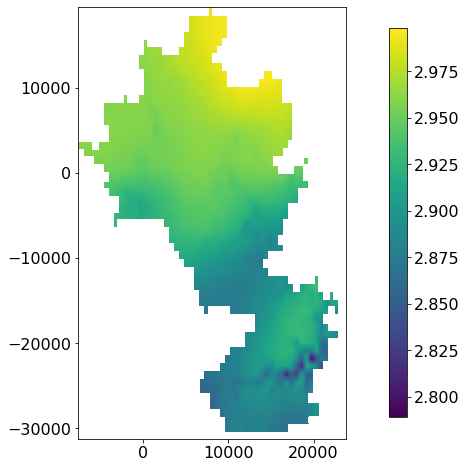

In [272]:
gk.drawRaster(ras, figsize=(6,6))

In [288]:
# Get the average of raster values which are within the region mask 
aachen_rm.warp(r"C:\Users\s.ryberg\FZJ\data\geography\global_solar_atlas\World_GHI_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF\GHI.tif")[aachen_rm.mask].mean()

2.9310975

(array([1.93000e+02, 1.28100e+03, 4.91500e+03, 6.80170e+04, 3.40446e+05,
        1.96429e+05, 2.64498e+05, 2.99985e+05, 4.26737e+05, 1.71008e+05]),
 array([2.789051 , 2.8100007, 2.8309503, 2.8519   , 2.8728497, 2.8937993,
        2.914749 , 2.9356985, 2.9566483, 2.977598 , 2.9985476],
       dtype=float32),
 <BarContainer object of 10 artists>)

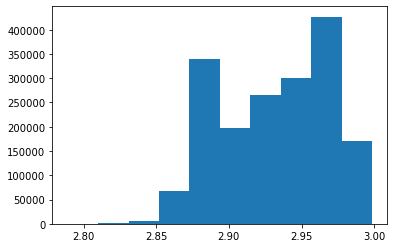

In [275]:
plt.hist(aachen_rm.warp(r"C:\Users\s.ryberg\FZJ\data\geography\global_solar_atlas\World_GHI_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF\GHI.tif")[aachen_rm.mask])

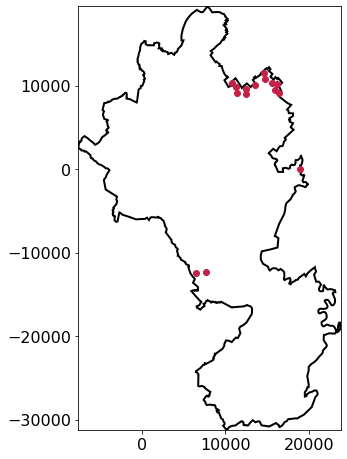

In [280]:
aachen_points = aachen_rm.extractFeatures(r"C:\Users\s.ryberg\FZJ\data\results\1832_Onshore_turbine_placements\02_updated_placement_files\turbine_placements_8Dx4D_DEU.shp")
aachen_rm.drawGeoms(aachen_points, figsize=(6,6))
plt.show()

AxHands(ax=<matplotlib.axes._axes.Axes object at 0x0000019DB79786D0>, handles=0      [Line2D(_line0)]
1      [Line2D(_line1)]
2      [Line2D(_line2)]
3      [Line2D(_line3)]
4      [Line2D(_line4)]
5      [Line2D(_line5)]
6      [Line2D(_line6)]
7      [Line2D(_line7)]
8      [Line2D(_line8)]
9      [Line2D(_line9)]
10    [Line2D(_line10)]
11    [Line2D(_line11)]
12    [Line2D(_line12)]
13    [Line2D(_line13)]
14    [Line2D(_line14)]
dtype: object, cbar=None)

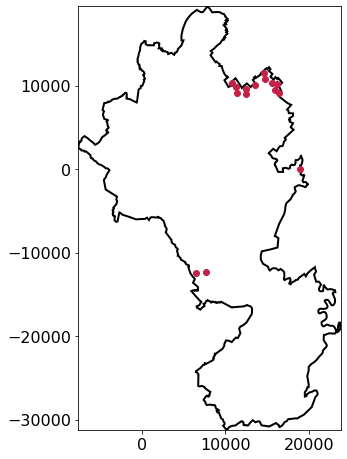

In [284]:
# Create a raster
example_data = np.ones_like(aachen_rm.mask)

aachen_rm.createRaster(data=example_data, output="rm_raster.tif")

'rm_raster.tif'

AxHands(ax=<matplotlib.axes._axes.Axes object at 0x0000019DB50E1220>, handles=<matplotlib.image.AxesImage object at 0x0000019DB500C3A0>, cbar=<matplotlib.colorbar.Colorbar object at 0x0000019DB500C970>)

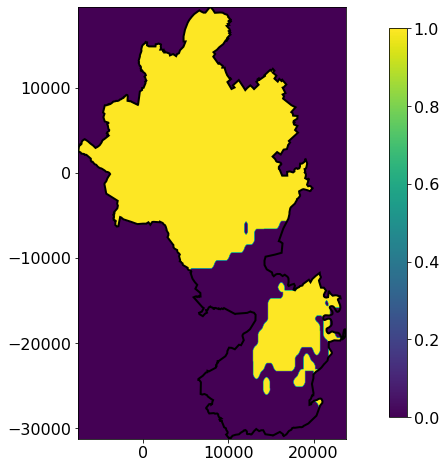

In [287]:
# Indicating things
tmp = aachen_rm.indicateValues(
    source=r"C:\Users\s.ryberg\FZJ\data\geography\global_solar_atlas\World_GHI_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF\GHI.tif",
    value=(2.9,None),
    buffer=100
)

aachen_rm.drawImage(tmp, figsize=(6,6))